In [1]:
!nvidia-smi

Thu Apr 22 07:22:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 40kB/s 


In [37]:
import numpy as np
import pandas as pd
concrete_data = pd.read_csv('compresive_strength_concrete.csv')

In [38]:
import tensorflow as tf
import tensorflow.keras.backend as K

In [39]:
concrete_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [40]:
#check if there are empty cells#
concrete_data.isnull().any()

Cement (component 1)(kg in a m^3 mixture)                False
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    False
Fly Ash (component 3)(kg in a m^3 mixture)               False
Water  (component 4)(kg in a m^3 mixture)                False
Superplasticizer (component 5)(kg in a m^3 mixture)      False
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     False
Fine Aggregate (component 7)(kg in a m^3 mixture)        False
Age (day)                                                False
Concrete compressive strength(MPa, megapascals)          False
dtype: bool

In [41]:
concrete_data.shape

(1030, 9)

In [42]:
concrete_data.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [43]:
concrete_data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [45]:
y_train = concrete_data.iloc[:,-1:]
x_train = concrete_data.iloc[:,0:-1]
y_test = concrete_data.iloc[:,-1]
x = concrete_data.iloc[:,0:-1]

In [46]:
x_train.shape

(1030, 8)

In [47]:
y_train.shape

(1030, 1)

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.30, random_state=42)

In [49]:
x_train.shape

(721, 8)

In [50]:
x_test.shape

(309, 8)

In [51]:
y_train.shape

(721, 1)

In [52]:
y_test.shape

(309, 1)

In [53]:
x.mean = x_train.mean(axis=0)
x_train -= x.mean
x.std = x_train.std(axis=0)
x_train /= x.std
x_test -= x.mean
x_test /= x.std

In [54]:
x.mean

Cement (component 1)(kg in a m^3 mixture)                284.412344
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     74.972399
Fly Ash (component 3)(kg in a m^3 mixture)                52.007490
Water  (component 4)(kg in a m^3 mixture)                181.806380
Superplasticizer (component 5)(kg in a m^3 mixture)        6.126768
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     973.798474
Fine Aggregate (component 7)(kg in a m^3 mixture)        771.637725
Age (day)                                                 46.049931
dtype: float64

In [55]:
x.std

Cement (component 1)(kg in a m^3 mixture)                108.360156
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     87.717518
Fly Ash (component 3)(kg in a m^3 mixture)                63.707622
Water  (component 4)(kg in a m^3 mixture)                 21.158364
Superplasticizer (component 5)(kg in a m^3 mixture)        6.046401
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      78.509319
Fine Aggregate (component 7)(kg in a m^3 mixture)         80.125986
Age (day)                                                 61.650743
dtype: float64

In [56]:
y.mean = y_train.mean(axis=0)
y_train -= y.mean
y.std = y_train.std(axis=0)
y_train /= y.std
y_test -= y.mean
y_test /= y.std

In [57]:
y.mean

Concrete compressive strength(MPa, megapascals)     36.152732
dtype: float64

In [58]:
y.std

Concrete compressive strength(MPa, megapascals)     16.803538
dtype: float64

In [59]:
x_train = x.to_numpy()
y_train = y.to_numpy()
x_test = x.to_numpy()
y_test = y.to_numpy()

In [60]:
x_train

array([[ 540. ,    0. ,    0. , ..., 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. , ..., 1055. ,  676. ,   28. ],
       [ 332.5,  142.5,    0. , ...,  932. ,  594. ,  270. ],
       ...,
       [ 148.5,  139.4,  108.6, ...,  892.4,  780. ,   28. ],
       [ 159.1,  186.7,    0. , ...,  989.6,  788.9,   28. ],
       [ 260.9,  100.5,   78.3, ...,  864.5,  761.5,   28. ]])

In [61]:
from tensorflow.keras import models
from tensorflow.keras import layers
def build_model(abc):
    model = models.Sequential()
    model.add(layers.Dense(128, activation= abc , input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(64, activation= abc ))
    model.add(layers.Dense(32, activation= abc ))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [62]:
build_model

<function __main__.build_model>

In [63]:
build_model('relu').summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_33 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_34 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 33        
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [64]:
build_model('tanh').summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_37 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_38 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 33        
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


**k fold validation with relu**

In [65]:
k = 4
num_val_samples = len(x_train) // k
num_epochs = 200
all_scores = []

In [66]:
all_mae_histories_relu = []
for i in range(k):
    print('processing fold #', i)
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([x_train[:i * num_val_samples],
        x_train[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
        y_train[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model('relu')
    history_relu =model.fit(partial_train_data, partial_train_targets,
        epochs=num_epochs, batch_size=16, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
    all_scores.append(val_mae)
    mae_history_relu = history_relu.history['mae']
    all_mae_histories_relu.append(mae_history_relu)

processing fold # 0
Epoch 1/200
49/49 [==============================] - 1s 3ms/step - loss: 750.7878 - mae: 19.3314
Epoch 2/200
49/49 [==============================] - 0s 3ms/step - loss: 280.0883 - mae: 13.6187
Epoch 3/200
49/49 [==============================] - 0s 3ms/step - loss: 222.4304 - mae: 12.2596
Epoch 4/200
49/49 [==============================] - 0s 3ms/step - loss: 216.6571 - mae: 11.8149
Epoch 5/200
49/49 [==============================] - 0s 3ms/step - loss: 180.2792 - mae: 10.6828
Epoch 6/200
49/49 [==============================] - 0s 3ms/step - loss: 137.1491 - mae: 9.2713
Epoch 7/200
49/49 [==============================] - 0s 3ms/step - loss: 117.4982 - mae: 8.7699
Epoch 8/200
49/49 [==============================] - 0s 3ms/step - loss: 103.5691 - mae: 8.2125
Epoch 9/200
49/49 [==============================] - 0s 3ms/step - loss: 98.0560 - mae: 7.8639
Epoch 10/200
49/49 [==============================] - 0s 3ms/step - loss: 111.9030 - mae: 8.2233
Epoch 11/200
49

In [67]:
average_mae_history_relu = [np.mean([x[i] for x in all_mae_histories_relu]) for i in range(num_epochs)]

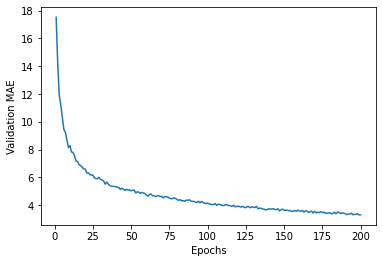

In [68]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history_relu) + 1), average_mae_history_relu)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [69]:
k = 4
num_val_samples = len(x_train) // k
num_epochs = 200
all_scores_tahn = []

In [70]:
all_mae_histories_tanh = []
for i in range(k):
    print('processing fold #', i)
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([x_train[:i * num_val_samples],
        x_train[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
        y_train[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model('tanh')
    history = model.fit(partial_train_data, partial_train_targets,
        epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores_tahn.append(val_mae)
    mae_history = history.history['mae']
    all_mae_histories_tanh.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [71]:
average_mae_history_tanh = [np.mean([x[i] for x in all_mae_histories_tanh]) for i in range(num_epochs)]

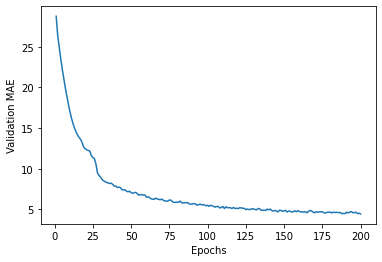

In [72]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history_tanh) + 1), average_mae_history_tanh)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [73]:
# Regularized model
from tensorflow.keras import regularizers
def build_model_regular(act):
    model = models.Sequential()
    model.add(layers.Dense(10, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001),input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(8, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
    model.add(layers.Dense(6, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [74]:
build_model_regular('tanh').summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_73 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_74 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


# K fold function with **regularizer**

In [75]:
k = 4
num_val_samples = len(x_train) // k
num_epochs = 200
all_scores_regul = []

In [76]:
all_mae_histories_regul = []
for i in range(k):
    print('processing fold #', i)
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([x_train[:i * num_val_samples],
        x_train[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
        y_train[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model('tanh')
    history_regul = model.fit(partial_train_data, partial_train_targets,
        epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores_regul.append(val_mae)
    mae_history_regul = history_regul.history['mae']
    all_mae_histories_regul.append(mae_history_regul)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [77]:
average_mae_history_regul = [np.mean([x[i] for x in all_mae_histories_regul]) for i in range(num_epochs)]

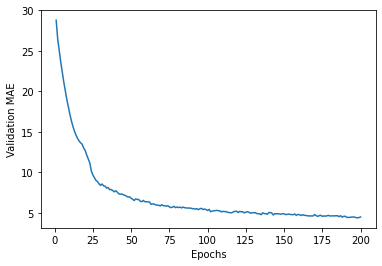

In [78]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history_regul) + 1), average_mae_history_regul)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [79]:
# dropout model
from tensorflow.keras import regularizers
def build_model_drop(act):
    model = models.Sequential()
    model.add(layers.Dense(10, activation= act,input_shape=(x_train.shape[1],)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(8, activation= act))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(6, activation= act))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [80]:
build_model_drop('relu').summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 10)                90        
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_93 (Dense)             (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_94 (Dense)             (None, 6)                 54        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_95 (Dense)             (None, 1)               

# K fold function with **dropout**

In [81]:
k = 4
num_val_samples = len(x_train) // k
num_epochs = 200
all_scores_drop = []

In [82]:
all_mae_histories_drop = []
for i in range(k):
    print('processing fold #', i)
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([x_train[:i * num_val_samples],
        x_train[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
        y_train[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model('relu')
    history_drop = model.fit(partial_train_data, partial_train_targets,
        epochs=num_epochs, batch_size=16, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
    all_scores_drop.append(val_mae)
    mae_history_drop = history_drop.history['mae']
    all_mae_histories_drop.append(mae_history_drop)

processing fold # 0
Epoch 1/200
49/49 [==============================] - 1s 3ms/step - loss: 1044.4305 - mae: 22.3567
Epoch 2/200
49/49 [==============================] - 0s 3ms/step - loss: 230.2034 - mae: 12.1582
Epoch 3/200
49/49 [==============================] - 0s 3ms/step - loss: 250.1213 - mae: 12.5902
Epoch 4/200
49/49 [==============================] - 0s 3ms/step - loss: 174.5596 - mae: 10.7396
Epoch 5/200
49/49 [==============================] - 0s 3ms/step - loss: 165.3920 - mae: 10.3395
Epoch 6/200
49/49 [==============================] - 0s 3ms/step - loss: 155.1276 - mae: 9.9058
Epoch 7/200
49/49 [==============================] - 0s 3ms/step - loss: 138.3459 - mae: 9.3273
Epoch 8/200
49/49 [==============================] - 0s 3ms/step - loss: 149.7052 - mae: 9.7539
Epoch 9/200
49/49 [==============================] - 0s 4ms/step - loss: 120.3537 - mae: 8.6479
Epoch 10/200
49/49 [==============================] - 0s 3ms/step - loss: 121.7583 - mae: 8.6347
Epoch 11/200


In [83]:
average_mae_history_drop = [np.mean([x[i] for x in all_mae_histories_drop]) for i in range(num_epochs)]

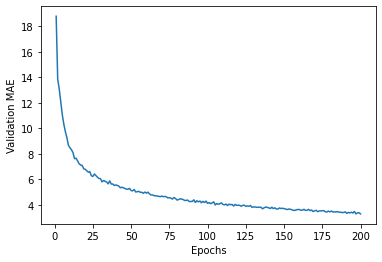

In [84]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history_drop) + 1), average_mae_history_drop)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [85]:
all_scores

[8.581615447998047, 8.800036430358887, 8.415959358215332, 8.262763023376465]

In [86]:
all_scores_tahn

[9.174101829528809, 10.36596393585205, 5.841804027557373, 9.131098747253418]

In [87]:
all_scores_regul

[8.478777885437012, 11.153578758239746, 5.95247745513916, 9.323196411132812]

In [88]:
all_scores_drop

[7.816442489624023, 8.097707748413086, 5.510960102081299, 10.350759506225586]

In [89]:
model_tanh = build_model('tanh')
model_tanh.fit(x_train, y_train,epochs= 200, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_tanh.evaluate(x_test, y_test)

33/33 [==============================] - 0s 2ms/step - loss: 45.3788 - mae: 5.1092


In [90]:
model_relu = build_model('relu')
model_relu.fit(x_train, y_train,epochs= 200, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_relu.evaluate(x_test, y_test)

33/33 [==============================] - 0s 2ms/step - loss: 25.5333 - mae: 3.6781


In [93]:
model_regular = build_model_regular('relu')
model_regular.fit(x_train, y_train,epochs= 200, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model_regular.evaluate(x_test, y_test)

33/33 [==============================] - 0s 2ms/step - loss: 46.1383 - mae: 5.4214


In [92]:
model_drop = build_model_drop('relu')
model_drop.fit(x_train, y_train,epochs= 200, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model_drop.evaluate(x_test, y_test)

33/33 [==============================] - 0s 2ms/step - loss: 122.6175 - mae: 8.3700
